In [1]:
# A linear regression learning algorithm example using TensorFlow library.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
rng = np.random

In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 50

In [2]:
# Training Data
train_X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]



In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [5]:
# Create Model

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [6]:
# Construct a linear model
activation = tf.add(tf.mul(X, W), b)

In [7]:
# Minimize the squared errors for Linear regression
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples) #L2 loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

In [8]:
# Initializing the variables
init = tf.initialize_all_variables()

Epoch: 0001 cost= 17.339784622 W= -0.470704 b= -0.32896
Epoch: 0051 cost= 0.132458374 W= 0.381352 b= -0.146394
Epoch: 0101 cost= 0.126045749 W= 0.373516 b= -0.0900199
Epoch: 0151 cost= 0.120373867 W= 0.366145 b= -0.0369989
Epoch: 0201 cost= 0.115357183 W= 0.359214 b= 0.0128686
Epoch: 0251 cost= 0.110920087 W= 0.352694 b= 0.0597703
Epoch: 0301 cost= 0.106995612 W= 0.346562 b= 0.103883
Epoch: 0351 cost= 0.103524625 W= 0.340795 b= 0.145371
Epoch: 0401 cost= 0.100454666 W= 0.335371 b= 0.184392
Epoch: 0451 cost= 0.097739473 W= 0.330269 b= 0.221092
Epoch: 0501 cost= 0.095338106 W= 0.325471 b= 0.25561
Epoch: 0551 cost= 0.093214288 W= 0.320958 b= 0.288074
Epoch: 0601 cost= 0.091335908 W= 0.316714 b= 0.318608
Epoch: 0651 cost= 0.089674711 W= 0.312722 b= 0.347326
Epoch: 0701 cost= 0.088205561 W= 0.308967 b= 0.374336
Epoch: 0751 cost= 0.086906254 W= 0.305436 b= 0.39974
Epoch: 0801 cost= 0.085757241 W= 0.302115 b= 0.423632
Epoch: 0851 cost= 0.084741123 W= 0.298991 b= 0.446103
Epoch: 0901 cost= 0.0

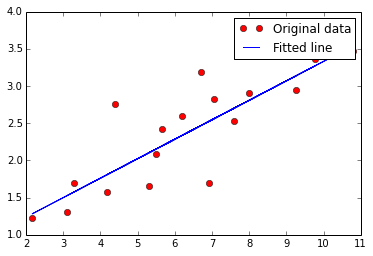

In [9]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    print "cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b)

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()